In [19]:
import numpy as np
import pandas as pd
import gc
import os
from multiprocessing import Pool, cpu_count
NTHREAD = cpu_count()
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import utils

In [3]:
bure = utils.read_pickles('../data/bureau')

100%|██████████| 20/20 [00:16<00:00,  1.20it/s]


In [5]:
KEY = 'SK_ID_CURR'


In [6]:
# latest
bure_l = bure.sort_values([KEY, 'DAYS_CREDIT'], ascending=[True, False]).drop_duplicates(KEY, keep='first').reset_index(drop=True)

# old
bure_o = bure.sort_values([KEY, 'DAYS_CREDIT'], ascending=[True, False]).drop_duplicates(KEY, keep='last').reset_index(drop=True)


In [8]:
prev = pd.read_csv('../input/previous_application.csv.zip')

In [9]:
# latest
prev_l = prev.sort_values([KEY, 'DAYS_DECISION'], ascending=[True, False]).drop_duplicates(KEY, keep='first').reset_index(drop=True)

# old
prev_o = prev.sort_values([KEY, 'DAYS_DECISION'], ascending=[True, False]).drop_duplicates(KEY, keep='last').reset_index(drop=True)


In [10]:
bure_l.SK_ID_BUREAU.corr(bure_l.DAYS_CREDIT)

0.006070449436402703

In [11]:
bure_o.SK_ID_BUREAU.corr(bure_o.DAYS_CREDIT)

0.018281102711500463

In [12]:
prev_l.SK_ID_PREV.corr(prev_l.DAYS_DECISION)

0.017310678804571242

In [13]:
prev_o.SK_ID_PREV.corr(prev_o.DAYS_DECISION)

0.0001569920371727724

In [14]:
train = utils.load_train()
test = utils.load_test()

100%|██████████| 20/20 [00:01<00:00, 11.84it/s]


In [15]:
train.SK_ID_CURR.describe()

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64

In [16]:
test.SK_ID_CURR.describe()

count     48744.000000
mean     277796.676350
std      103169.547296
min      100001.000000
25%      188557.750000
50%      277549.000000
75%      367555.500000
max      456250.000000
Name: SK_ID_CURR, dtype: float64

In [18]:
prev['data'] = 'train'
prev.loc[prev.SK_ID_CURR.isin(test.SK_ID_CURR), 'data']='test'

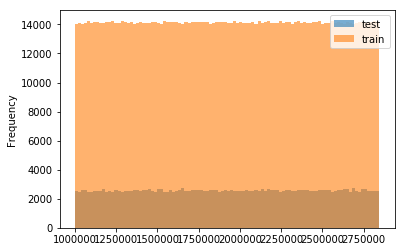

In [24]:
prev.groupby('data').SK_ID_PREV.plot(kind='hist', bins=100, alpha=0.6, legend=True); plt.show()

In [25]:
bure['data'] = 'train'
bure.loc[bure.SK_ID_CURR.isin(test.SK_ID_CURR), 'data']='test'

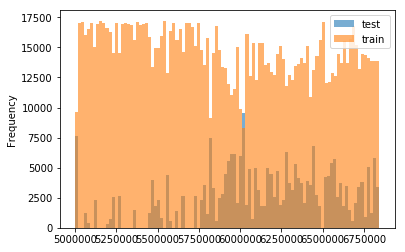

In [27]:
bure.groupby('data').SK_ID_BUREAU.plot(kind='hist', bins=100, alpha=0.6, legend=True); plt.show()

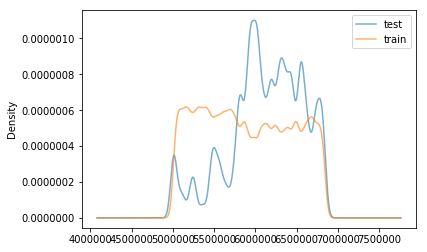

In [28]:
bure.groupby('data').SK_ID_BUREAU.plot(kind='kde', alpha=0.6, legend=True); plt.show()

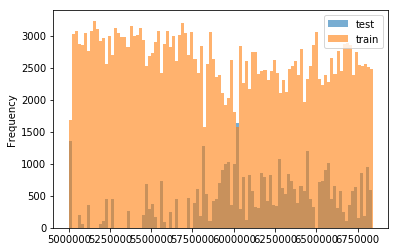

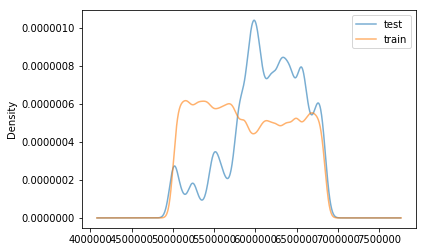

In [29]:

bure_l['data'] = 'train'
bure_l.loc[bure_l.SK_ID_CURR.isin(test.SK_ID_CURR), 'data']='test'

bure_l.groupby('data').SK_ID_BUREAU.plot(kind='hist', bins=100, alpha=0.6, legend=True); plt.show()

bure_l.groupby('data').SK_ID_BUREAU.plot(kind='kde', alpha=0.6, legend=True); plt.show()